In [18]:
import pandas as pd
import numpy as np
%matplotlib inline

In [19]:
df = pd.read_csv('fb.csv',parse_dates=['Date'],index_col='Date')
df

,Price
Date,
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32


In [20]:
df.shift(2) #shift to the right

,Price
Date,
2017-08-15,NaN
2017-08-16,NaN
2017-08-17,171.00
2017-08-18,170.00
2017-08-21,166.91
2017-08-22,167.41
2017-08-23,167.78
2017-08-24,169.64
2017-08-25,168.71


In [21]:
df.shift(-1)

,Price
Date,
2017-08-15,170.00
2017-08-16,166.91
2017-08-17,167.41
2017-08-18,167.78
2017-08-21,169.64
2017-08-22,168.71
2017-08-23,167.74
2017-08-24,166.32
2017-08-25,167.24


In [22]:
df['pre day price'] = df['Price'].shift(1)

In [23]:
df

,Price,pre day price
Date,,
2017-08-15,171.00,NaN
2017-08-16,170.00,171.00
2017-08-17,166.91,170.00
2017-08-18,167.41,166.91
2017-08-21,167.78,167.41
2017-08-22,169.64,167.78
2017-08-23,168.71,169.64
2017-08-24,167.74,168.71
2017-08-25,166.32,167.74


In [24]:
df['1 day change'] = df['Price'] - df['pre day price']
df

,Price,pre day price,1 day change
Date,,,
2017-08-15,171.00,NaN,NaN
2017-08-16,170.00,171.00,-1.00
2017-08-17,166.91,170.00,-3.09
2017-08-18,167.41,166.91,0.50
2017-08-21,167.78,167.41,0.37
2017-08-22,169.64,167.78,1.86
2017-08-23,168.71,169.64,-0.93
2017-08-24,167.74,168.71,-0.97
2017-08-25,166.32,167.74,-1.42


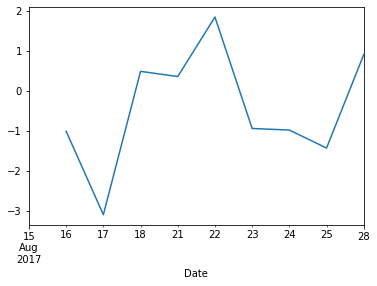

In [25]:
df['1 day change'].plot()

In [28]:
df['5 day % return']= ( df['Price'] - df['Price'].shift(5))*100/df['Price'].shift(5)
df

,Price,pre day price,1 day change,5 day % return
Date,,,,
2017-08-15,171.00,NaN,NaN,NaN
2017-08-16,170.00,171.00,-1.00,NaN
2017-08-17,166.91,170.00,-3.09,NaN
2017-08-18,167.41,166.91,0.50,NaN
2017-08-21,167.78,167.41,0.37,NaN
2017-08-22,169.64,167.78,1.86,-0.795322
2017-08-23,168.71,169.64,-0.93,-0.758824
2017-08-24,167.74,168.71,-0.97,0.497274
2017-08-25,166.32,167.74,-1.42,-0.651096


In [29]:
df

,Price,pre day price,1 day change,5 day % return
Date,,,,
2017-08-15,171.00,NaN,NaN,NaN
2017-08-16,170.00,171.00,-1.00,NaN
2017-08-17,166.91,170.00,-3.09,NaN
2017-08-18,167.41,166.91,0.50,NaN
2017-08-21,167.78,167.41,0.37,NaN
2017-08-22,169.64,167.78,1.86,-0.795322
2017-08-23,168.71,169.64,-0.93,-0.758824
2017-08-24,167.74,168.71,-0.97,0.497274
2017-08-25,166.32,167.74,-1.42,-0.651096


In [30]:
df.index

DatetimeIndex(['2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [31]:
idx = pd.date_range(start='2017-08-15',periods=10,freq='B')

In [32]:
idx

DatetimeIndex(['2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28'],
              dtype='datetime64[ns]', freq='B')

In [33]:
df.index = idx
df

,Price,pre day price,1 day change,5 day % return
2017-08-15,171.00,NaN,NaN,NaN
2017-08-16,170.00,171.00,-1.00,NaN
2017-08-17,166.91,170.00,-3.09,NaN
2017-08-18,167.41,166.91,0.50,NaN
2017-08-21,167.78,167.41,0.37,NaN
2017-08-22,169.64,167.78,1.86,-0.795322
2017-08-23,168.71,169.64,-0.93,-0.758824
2017-08-24,167.74,168.71,-0.97,0.497274
2017-08-25,166.32,167.74,-1.42,-0.651096
2017-08-28,167.24,166.32,0.92,-0.321850


In [34]:
df.tshift(1) #adjust dates, not the data points

,Price,pre day price,1 day change,5 day % return
2017-08-16,171.00,NaN,NaN,NaN
2017-08-17,170.00,171.00,-1.00,NaN
2017-08-18,166.91,170.00,-3.09,NaN
2017-08-21,167.41,166.91,0.50,NaN
2017-08-22,167.78,167.41,0.37,NaN
2017-08-23,169.64,167.78,1.86,-0.795322
2017-08-24,168.71,169.64,-0.93,-0.758824
2017-08-25,167.74,168.71,-0.97,0.497274
2017-08-28,166.32,167.74,-1.42,-0.651096
2017-08-29,167.24,166.32,0.92,-0.321850
